In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import math

## Plots for statistics: OLS, Lasso, Ridge, OLS_Lasso, OLS_Ridge, Lasso_Ridge

In [8]:
# Generating 'fake' data
def gen_data(nobs, num_cov, m):
    x_1 = np.random.normal(scale=1., size=(nobs))
    x_2 = np.random.normal(scale=1., size=(nobs, num_cov))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = (x_1 * m) + e
    return y, x_1, x_2

# Setup test
def setup_test_params(y, x_1, x_2, a, model):
    X = np.column_stack((x_1, x_2))
    if model == 1:
        ols = sm.OLS(y, X).fit()
        return ols
    elif model == 2:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        return lasso
    elif model == 3:
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return ridge
    elif model == 4:
        ols = sm.OLS(y, X).fit()
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        return ols, lasso
    elif model == 5:
        ols = sm.OLS(y, X).fit()
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return ols, ridge
    elif model == 6:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return lasso, ridge

def standardize(array):
    """divide by variance, multiple by sqrt(n)"""
    return np.sqrt(len(array))*array.mean()/array.std()
    
# MSE
def setup_test_mse(n, k, a, m, model):
    y1, x_11, x_21 = gen_data(nobs=n, num_cov=k, m=m)
    X1 = np.column_stack((x_11, x_21))

    y2, x_12, x_22 = gen_data(nobs=n, num_cov=k, m=m)   
    X2 = np.column_stack((x_12, x_22))
    
    statistic = None
    if model == 1:
        ols = sm.OLS(y1, X1).fit()
        statistic =  (y1-ols.predict(X1))**2
    elif model == 2:
        lasso = sm.OLS(y1, X1).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        statistic = (y1-lasso.predict(X1))**2
    elif model == 3:
        ridge = sm.OLS(y1, X1).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        statistic =  (y1-ridge.predict(X1))**2
    elif model == 4:
        ols = sm.OLS(y1, X1).fit()
        ols_mse = (y1-ols.predict(X1))**2
        lasso = sm.OLS(y2, X2).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        lasso_mse = (y2-lasso.predict(X2))**2
        statistic =  ols_mse - lasso_mse
    elif model == 5:
        ols = sm.OLS(y1, X1).fit()
        ols_mse = (y1-ols.predict(X1))**2
        ridge = sm.OLS(y2, X2).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        ridge_mse = (y2-ridge.predict(X2))**2
        statistic = ols_mse - ridge_mse
    elif model == 6:
        lasso = sm.OLS(y1, X1).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        lasso_mse = (y1-lasso.predict(X1))**2
        ridge = sm.OLS(y2, X2).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        ridge_mse = (y2-ridge.predict(X2))**2
        statistic = lasso_mse - ridge_mse
    return standardize(statistic)


# Calculate MSEs
def mse(lst, n, i, model):
    lst_cols = ['statistic_' + str(i)]
    df = pd.DataFrame(lst, columns=lst_cols)
    print("Mean:", np.mean(df)[0], "Median:", np.median(df), "Mode:", stats.mode(df)[0], "Variance:", np.var(df)[0])
    return plt.hist(df['statistic_'+str(i)], label='mse_'+str(i),alpha=0.5)


print(setup_test_mse(1000, 1, .1, 1, 1))

22.162786843688746


### Varying values

In [9]:
# Vary number of observations
def vary_obs(model):
    k = 10
    m = 1
    a = 0.1
    n = [100,250,500,1000]
    for i in n: 
        lst = []
        for j in range(1000):
            results = setup_test_mse(i, k, a, m, model)
            lst.append(results)
        output = mse(lst, i, i, model)
    plt.legend()
    plt.show()

# Vary alpha levels
def vary_alpha(model):
    k = 10
    m = 10
    a = [0,0.1,0.5,1]
    n = 1000
    for i in a: 
        lst = []
        for j in range(1000):
            results = setup_test_mse(n, k, i, m, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()

# Vary number of x variables
def vary_xvars(model):
    k = [1,10,25,50]
    m = 1
    a = 0.1
    n = 1000
    for i in k: 
        lst = []
        for j in range(1000):
            results = setup_test_mse(n, i, a, m, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()

# Vary the model with a multiplicative factor
def vary_multiply(model):
    k = 10
    m = [0.1,0.5,1,2]
    a = 0.1
    n = 1000
    for i in m: 
        lst = []
        for j in range(1000):
            results = setup_test_mse(n, k, a, i, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()    
    
def params_scatter(model):
    single_models = [1,2,3]
    k = [1,10,25,50]
    m = 1
    a = 0.1
    n = 1000
    if model in single_models:
        for i in k:
            y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m)
            x = setup_test_params(y, x_1, x_2, a, model)
            plt.scatter(range(len(x.params)), x.params, label=i)
        plt.legend()
        plt.show()
    else:
        for i in k:
            y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m)
            x = setup_test_params(y, x_1, x_2, a, model)
            for j in list(setup_test_params(y, x_1, x_2, a, model)):
                plt.scatter(range(len(j.params)), j.params)
        plt.legend(['model1','model2'])
        plt.show()

Vary Observations
Mean: -0.3803884317234094 Median: -0.421274778200157 Mode: [[-3.57016086]] Variance: 1.0907369185979925
Mean: -0.3014791337277256 Median: -0.347242605406104 Mode: [[-3.49311806]] Variance: 1.0244654499111425
Mean: -0.2864986781061964 Median: -0.28494371162768595 Mode: [[-3.563453]] Variance: 1.059934275397208
Mean: -0.2931425674535571 Median: -0.2504369546673319 Mode: [[-3.63229532]] Variance: 1.035573948396882


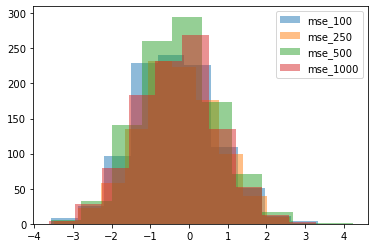

Vary Alpha Levels
Mean: 0.037847826420243744 Median: 0.04074820322943515 Mode: [[-3.27946252]] Variance: 1.0002759402139692
Mean: -0.38233309325481885 Median: -0.4038647291049726 Mode: [[-3.67912633]] Variance: 1.0204685768407051
Mean: -3.619862957061345 Median: -3.6252237294707816 Mode: [[-6.38746882]] Variance: 0.769509758476719
Mean: -10.185830281700158 Median: -10.179981401794754 Mode: [[-12.41918242]] Variance: 0.5573261484590051


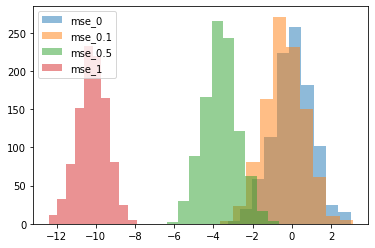

Vary Multiplicative Factors
Mean: -0.2830361321946318 Median: -0.28301119023202226 Mode: [[-3.872088]] Variance: 1.0529879163564597
Mean: -0.2765995237463424 Median: -0.27831598665906854 Mode: [[-3.40405009]] Variance: 1.1037734594907742
Mean: -0.27316492238332063 Median: -0.3177392329029387 Mode: [[-3.67302571]] Variance: 0.992264837673398
Mean: -0.3295929868226882 Median: -0.31684434154965063 Mode: [[-3.39166001]] Variance: 0.9736409299060597


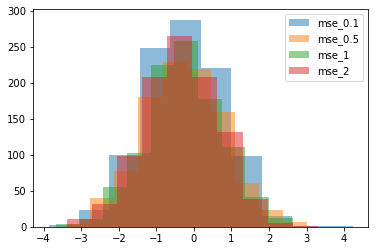

Vary X Variables
Mean: -0.1594735938194251 Median: -0.17018129202054905 Mode: [[-3.07925096]] Variance: 0.9909961260554437
Mean: -0.29320114167097283 Median: -0.31503866990611873 Mode: [[-3.39773654]] Variance: 0.9888871285553791
Mean: -0.5842105010435339 Median: -0.5766896366878704 Mode: [[-3.73925663]] Variance: 0.9839949297819588
Mean: -1.0268871885853947 Median: -1.0499148091465753 Mode: [[-4.63056628]] Variance: 0.9787804959862987


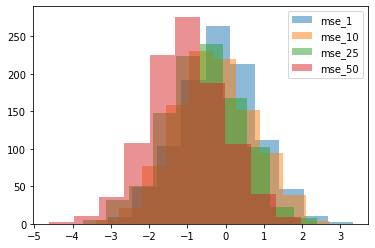

In [10]:
# Model = 4 is OlS - Lasso
print('Vary Observations')
vary_obs(4)
print('Vary Alpha Levels')
vary_alpha(4)
print('Vary Multiplicative Factors')
vary_multiply(4)
print('Vary X Variables')
vary_xvars(4)

Vary Observations
Mean: -0.14285022792688337 Median: -0.18593240353557516 Mode: [[-3.13055032]] Variance: 1.054885004985061
Mean: -0.07772096194432501 Median: -0.03361015856237195 Mode: [[-3.39708073]] Variance: 0.9152240736736387
Mean: -0.08490640307955857 Median: -0.09694168242684073 Mode: [[-3.25516728]] Variance: 1.0093113425885705
Mean: -0.18717220145596603 Median: -0.2209123287115619 Mode: [[-3.64844992]] Variance: 1.0362222630290343


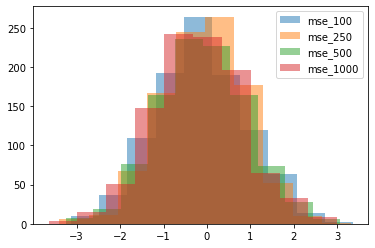

Vary Alpha Levels
Mean: 0.016878369317334527 Median: 0.015273612433171952 Mode: [[-2.8879318]] Variance: 1.0311544429989143
Mean: -9.028380603819425 Median: -9.003315862420768 Mode: [[-11.20022698]] Variance: 0.610462007034862
Mean: -20.514014985821913 Median: -20.517455460957663 Mode: [[-22.68600802]] Variance: 0.6033542053372953
Mean: -21.56579408822342 Median: -21.58224931255789 Mode: [[-24.29444921]] Variance: 0.6271097082921429


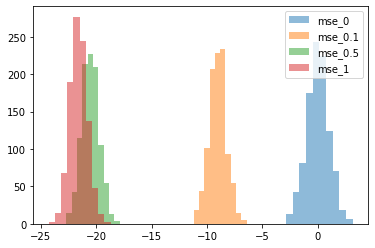

Vary Multiplicative Factors
Mean: -0.010727413796119068 Median: -0.010548257887090203 Mode: [[-3.85593188]] Variance: 1.0636178625142927
Mean: -0.04300647809551234 Median: -0.03231035879338949 Mode: [[-3.25265711]] Variance: 0.932277048797772
Mean: -0.167591183855832 Median: -0.1718290128397408 Mode: [[-3.08270774]] Variance: 0.9361821649276318
Mean: -0.5090338658915768 Median: -0.48979549674719547 Mode: [[-3.78446496]] Variance: 0.9845246481760942


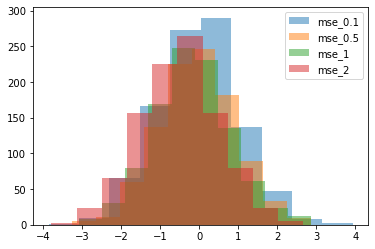

Vary X Variables
Mean: -0.15800246520151556 Median: -0.1470204957514577 Mode: [[-4.03179936]] Variance: 1.0129476971620446
Mean: -0.0803826305499311 Median: -0.07307786112986181 Mode: [[-3.59863925]] Variance: 0.9869931769488052
Mean: -0.16185905329078523 Median: -0.16419955541901218 Mode: [[-3.14839415]] Variance: 1.0310441755142714
Mean: -0.1685068832383228 Median: -0.1308751175779358 Mode: [[-3.44176075]] Variance: 1.053782605738147


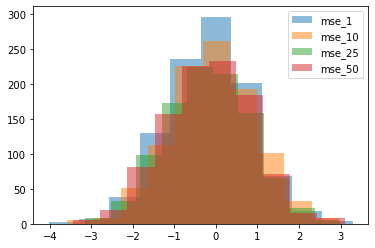

In [11]:
# Model = 5 is OlS - Ridge
print('Vary Observations')
vary_obs(5)
print('Vary Alpha Levels')
vary_alpha(5)
print('Vary Multiplicative Factors')
vary_multiply(5)
print('Vary X Variables')
vary_xvars(5)

Vary Observations
Mean: 0.2777530604302052 Median: 0.2675845145991355 Mode: [[-2.8016863]] Variance: 1.0852169122181623
Mean: 0.2998332334888712 Median: 0.2978750019696861 Mode: [[-2.9174463]] Variance: 0.9756217952996644
Mean: 0.24554646958492 Median: 0.23264313193470937 Mode: [[-3.30575777]] Variance: 1.00806819533359
Mean: 0.16169756335028285 Median: 0.17662682077200753 Mode: [[-2.72931886]] Variance: 0.936026054753155


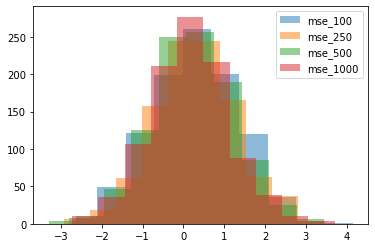

Vary Alpha Levels
Mean: 0.027144733138336707 Median: 0.0440915093060701 Mode: [[-3.24472984]] Variance: 1.0824238295931723
Mean: -8.758512606958607 Median: -8.762827247898649 Mode: [[-12.01256046]] Variance: 0.5750821612135115
Mean: -20.04532271622012 Median: -20.072836935891587 Mode: [[-22.31331165]] Variance: 0.6169448349113662
Mean: -20.644579631751746 Median: -20.65034816477762 Mode: [[-23.39056516]] Variance: 0.6166960213828299


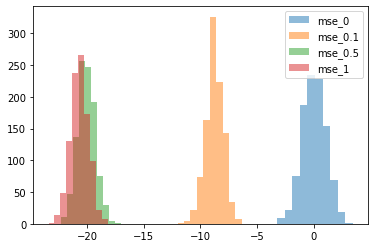

Vary Multiplicative Factors
Mean: 0.2841576307705493 Median: 0.2555060607761518 Mode: [[-2.77621716]] Variance: 1.0087853159148104
Mean: 0.2955132506930327 Median: 0.2882635747581471 Mode: [[-2.74735558]] Variance: 0.9864447842622485
Mean: 0.19364153008522073 Median: 0.21073764923369515 Mode: [[-2.46217198]] Variance: 0.9846064797148625
Mean: -0.17292653035409236 Median: -0.17622494114584958 Mode: [[-3.08942449]] Variance: 1.0201788301365802


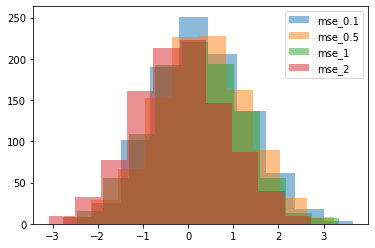

Vary X Variables
Mean: 0.023537112913608053 Median: 0.044886975289782374 Mode: [[-2.8993585]] Variance: 1.0127006824106917
Mean: 0.11481566857048772 Median: 0.06841212384684742 Mode: [[-3.1290129]] Variance: 0.9359368644713684
Mean: 0.4635406863320786 Median: 0.5080365783801415 Mode: [[-2.76188231]] Variance: 0.9797317390645206
Mean: 0.8338077235339945 Median: 0.8251715388434457 Mode: [[-1.89196804]] Variance: 0.950901139603542


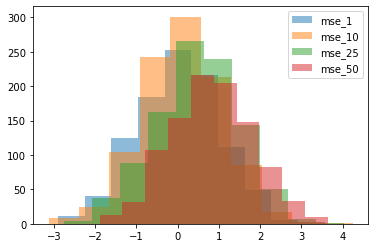

In [12]:
# Model = 6 is Lasso - Ridge
print('Vary Observations')
vary_obs(6)
print('Vary Alpha Levels')
vary_alpha(6)
print('Vary Multiplicative Factors')
vary_multiply(6)
print('Vary X Variables')
vary_xvars(6)